# MARQUER Matthieu
## Projet 9 part.2
![alt text](Logo.png "La poule qui chante")

# Notebook contenant le/les clusterings effectués, et les différentes visualisations associées.

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Importation des fichiers excel

In [2]:
# Import csv
Df_In = pd.read_csv ('DF_Final.csv')
DF_Eco = pd.read_csv ('DF_Eco.csv')

In [3]:
Df_In.head(2)

,Zone,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
0,Afrique du Sud,2035.0,514.0,63.0,-451.0,14.11,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188
1,Albanie,47.0,38.0,0.0,-38.0,6.26,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871


In [4]:
DF_Eco.head(2)

,Zone,Balance commercial: import export volaille,Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
0,Afrique du Sud,-451.0,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188
1,Albanie,-38.0,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871


# ACP: Analyse en composantes principales

In [5]:
# Zone en index
DF_Eco = DF_Eco.set_index('Zone')
DF_Eco.head(2)

,Balance commercial: import export volaille,Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,
Afrique du Sud,-451.0,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188
Albanie,-38.0,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871


In [6]:
DF_Eco.shape

(100, 7)

In [7]:
# transformer les données en array numpy
X = DF_Eco.values

In [8]:
# Enregistrement des noms de pays
pays = DF_Eco.index
pays

Index(['Afrique du Sud', 'Albanie', 'Algérie', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Arménie', 'Autriche', 'Bangladesh', 'Barbade',
       'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Bulgarie', 'Bénin', 'Cameroun', 'Chili',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Côte d'Ivoire', 'Dominique', 'El Salvador', 'Estonie',
       'Eswatini', 'Fidji', 'Finlande', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Géorgie', 'Haïti',
       'Honduras', 'Irlande', 'Islande', 'Jamaïque', 'Japon', 'Jordanie',
       'Kazakhstan', 'Kenya', 'Kirghizistan', 'Koweït', 'Lesotho', 'Lettonie',
       'Libéria', 'Luxembourg', 'Macédoine du Nord', 'Madagascar', 'Malaisie',
       'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mexique', 'Mongolie',
       'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Norvège',
       'Népal', 'Oman', 'Ouganda', 'Pana

In [9]:
# Enregistrement des noms de colonnes
features = DF_Eco.columns
features

Index(['Balance commercial: import export volaille',
       'Evolution Population 2000_2018 (%)', 'Population_2017',
       'Political_Stability_2017',
       'Croissance annuelle Pib US$ par habitant (%) 2017',
       'Pib US$ par habitant (2017)', 'Inflation alimentaire (%) 2017'],
      dtype='object')

In [10]:
# Instanciation
scaler = StandardScaler()
# Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X)

In [11]:
# On espère avoir une moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01


# 1.2 PCA

In [12]:
# Travail sur les 4 premieres composantes
n_components = 4
# On instancie notre ACP
pca = PCA(n_components=4)
# Entrainement des données scalées
pca.fit(X_scaled)

PCA(n_components=4)

# 1.3 Explained variance & scree plot

In [13]:
# Variance captée par chaque composante (% de chaque)
print(pca.explained_variance_ratio_)
# Total des 4 composantes (%)
print(pca.explained_variance_ratio_.sum())

# 1ère composante capte 27%, 2ème 18%....

[0.30346353 0.20778972 0.18380392 0.11306107]
0.8081182368785871


In [14]:
# Variance
evr = pca.explained_variance_ratio_
df_evr = pd.DataFrame (evr, columns =['Variance'])
df_evr.reset_index(inplace = True)
df_evr

,index,Variance
0,0,0.303464
1,1,0.207790
2,2,0.183804
3,3,0.113061


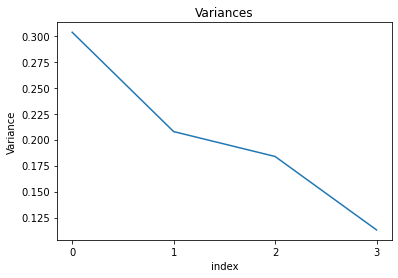

In [15]:
# test
sns.lineplot(data=df_evr, x="index", y="Variance")
plt.title("Variances")
plt.xticks([0, 1, 2, 3])
plt.show()

In [16]:
# Enregistrement dans variable "scree" et "scree_cum"
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
# Variable: liste de composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

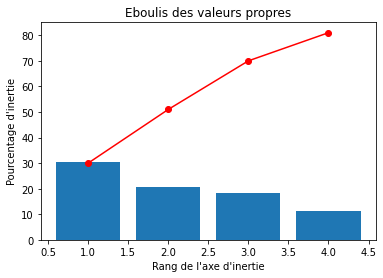

In [17]:
# Vue graphique Eboulis des valeurs propres Bleu: variance de chaque composante    Rouge: variance cumulée    dont + de 90% en 5 composantes
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig("Eboulis.png")
plt.show()

#On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
#On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

# 1.4 Components

In [18]:
# Formule de calcul donnée par l'attribut components_
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,-0.209108,0.206264,0.406833,-0.588599,0.019457,-0.502632,0.385681
1,-0.670350,-0.198239,0.564201,0.167146,0.143056,0.350103,-0.148438
2,-0.221354,0.587220,-0.012482,-0.044508,-0.697527,0.095470,-0.329212
3,-0.100850,0.647532,-0.148705,0.164760,0.396750,0.373310,0.473817


In [19]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Balance commercial: import export volaille,Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
F1,-0.21,0.21,0.41,-0.59,0.02,-0.50,0.39
F2,-0.67,-0.20,0.56,0.17,0.14,0.35,-0.15
F3,-0.22,0.59,-0.01,-0.04,-0.70,0.10,-0.33
F4,-0.10,0.65,-0.15,0.16,0.40,0.37,0.47


In [20]:
# affichage en pivot
pcs.T

,F1,F2,F3,F4
Balance commercial: import export volaille,-0.209108,-0.670350,-0.221354,-0.100850
Evolution Population 2000_2018 (%),0.206264,-0.198239,0.587220,0.647532
Population_2017,0.406833,0.564201,-0.012482,-0.148705
Political_Stability_2017,-0.588599,0.167146,-0.044508,0.164760
Croissance annuelle Pib US$ par habitant (%) 2017,0.019457,0.143056,-0.697527,0.396750
Pib US$ par habitant (2017),-0.502632,0.350103,0.095470,0.373310
Inflation alimentaire (%) 2017,0.385681,-0.148438,-0.329212,0.473817


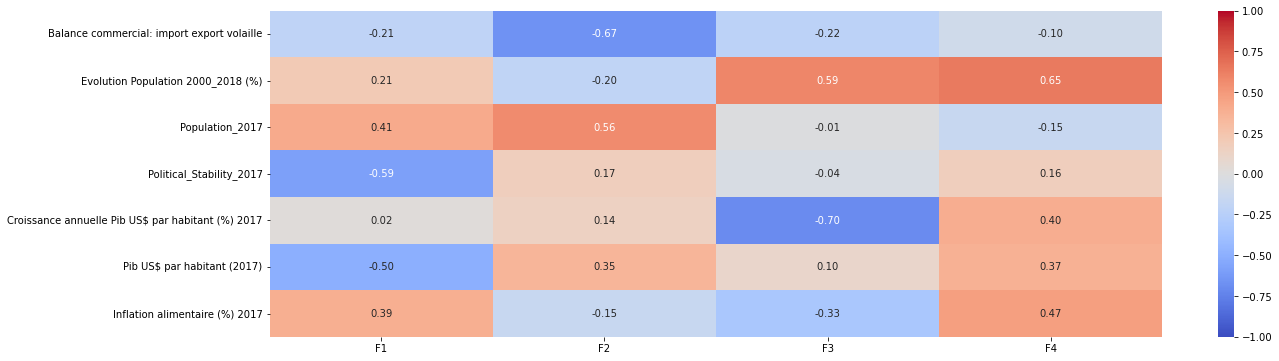

In [21]:
# Matrice de corrélation                              fmt = nb de chiffre apres la virgule
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig("Matrice.png")
plt.show()

# Les fonctions

In [22]:
# Fonction Correlation
def correlation_graph(pca, 
                      x_y, 
                      features) : 

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(7, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.01,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) 

    # Axes et display
    plt.axis('equal')
    plt.savefig("CercleCorr.png")
    plt.show()

In [23]:
# Fonction Projection
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[7, 7], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,7)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
    
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig("Projection.png")
    plt.show()

# 1.5 Correlation et projection graphique

In [24]:
# Calcule des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.63116661,  2.22129759, -0.95956951,  0.64682506],
       [-0.49909084, -0.19630551, -1.22543118, -0.5798953 ],
       [ 1.4453831 , -0.41987082,  0.13654795, -0.4400141 ],
       [-1.04589243, -0.50075234,  0.55378955, -0.38811436],
       [ 1.19837887,  2.70620597,  2.03644327,  0.24994374]])

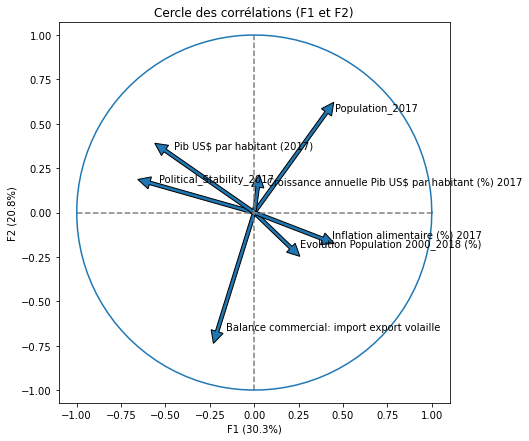

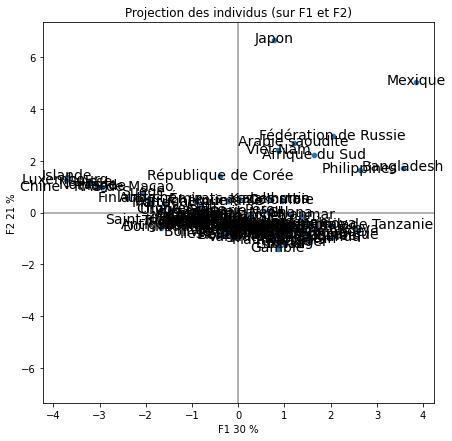

In [25]:
# Graphique F1 F2
correlation_graph(pca, (0,1), features) 
display_factorial_planes(X_proj, (0,1), pca, labels=pays, marker="o") 
#plt.savefig("eee.png")

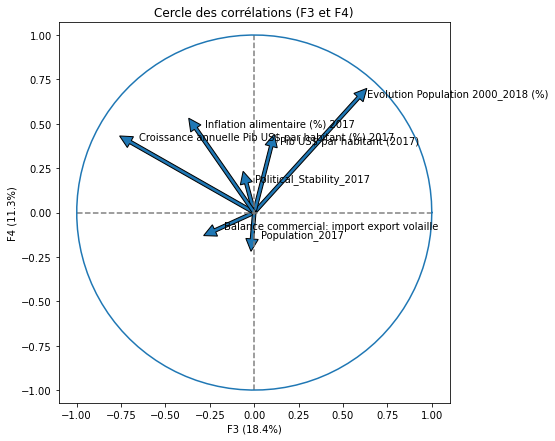

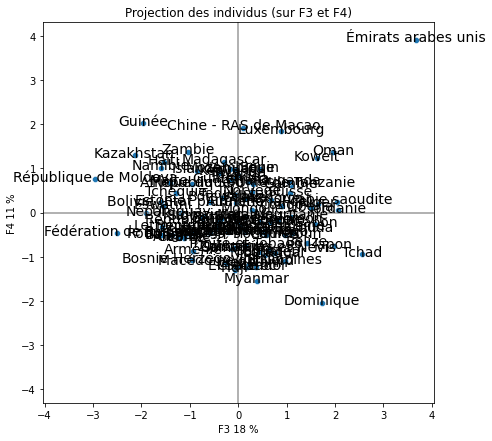

In [26]:
# Graphique F3 F4
correlation_graph(pca, (2,3), features)
display_factorial_planes(X_proj, (2,3), pca, labels=pays, marker="o")

# Fin ACP

# K-Means

In [27]:
# Zone en index
Df_In = Df_In.set_index('Zone')

In [28]:
# transformer les données en array numpy
X = Df_In.values
X

array([[ 2.03500000e+03,  5.14000000e+02,  6.30000000e+01, ...,
         1.61149730e+01,  6.12187657e+03,  5.07618800e+00],
       [ 4.70000000e+01,  3.80000000e+01,  0.00000000e+00, ...,
         9.85229800e+00,  4.51420491e+03,  3.49887100e+00],
       [ 2.64000000e+02,  2.00000000e+00,  0.00000000e+00, ...,
         4.13641700e+00,  4.10969600e+03,  5.25496900e+00],
       ...,
       [ 4.12000000e+02,  4.33000000e+02,  9.40000000e+01, ...,
         6.56220700e+00,  4.06448040e+04,  1.54549000e+00],
       [ 3.24000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         2.53145200e+00,  6.21350128e+03, -1.18179000e-01],
       [ 3.00000000e+00,  6.00000000e+00,  0.00000000e+00, ...,
         4.82566300e+00,  2.33287385e+03,  2.94605000e-01]])

In [29]:
# Enregistrement des noms de pays
pays_dfin = Df_In.index
pays_dfin

Index(['Afrique du Sud', 'Albanie', 'Algérie', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Arménie', 'Autriche', 'Bangladesh', 'Barbade',
       'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Bulgarie', 'Bénin', 'Cameroun', 'Chili',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Côte d'Ivoire', 'Dominique', 'El Salvador', 'Estonie',
       'Eswatini', 'Fidji', 'Finlande', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Géorgie', 'Haïti',
       'Honduras', 'Irlande', 'Islande', 'Jamaïque', 'Japon', 'Jordanie',
       'Kazakhstan', 'Kenya', 'Kirghizistan', 'Koweït', 'Lesotho', 'Lettonie',
       'Libéria', 'Luxembourg', 'Macédoine du Nord', 'Madagascar', 'Malaisie',
       'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mexique', 'Mongolie',
       'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Norvège',
       'Népal', 'Oman', 'Ouganda', 'Pana

In [30]:
# Enregistrement des noms de colonnes
features_dfin = Df_In.columns
features_dfin

Index(['Nourriture: Viande de Volailles', 'Importation: Viande de Volailles',
       'Exportation: Viande de Volailles',
       'Balance commercial: import export volaille',
       'Proteine: Viande de Volailles (g/personne/jour)',
       'Evolution Population 2000_2018 (%)', 'Population_2017',
       'Political_Stability_2017',
       'Croissance annuelle Pib US$ par habitant (%) 2017',
       'Pib US$ par habitant (2017)', 'Inflation alimentaire (%) 2017'],
      dtype='object')

In [31]:
# Instanciation
scaler = StandardScaler()
# Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.37581808,  2.52954707,  2.16099119, ...,  1.72277966,
        -0.37340154,  0.46850765],
       [-0.3925904 , -0.24390022, -0.4416172 , ...,  0.56711364,
        -0.45055555,  0.0501849 ],
       [-0.09040497, -0.45365674, -0.4416172 , ..., -0.4876512 ,
        -0.46996839,  0.51592244],
       ...,
       [ 0.11569385,  2.05759491,  3.44163976, ..., -0.04001452,
         1.28339325, -0.46787437],
       [-0.00685139, -0.46530988, -0.4416172 , ..., -0.78381914,
        -0.36900437, -0.90909867],
       [-0.45386302, -0.43035046, -0.4416172 , ..., -0.36046303,
        -0.55524012, -0.79962357]])

In [32]:
# On espère avoir une moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01


In [33]:
# Valeur vide 
intertia = []
# Nb cluster
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled) 
  intertia.append(kmeans.inertia_)

In [35]:
intertia

[1099.9999999999998,
 848.8031928812179,
 681.1855203364679,
 610.789333203241,
 553.1001800231642,
 501.5928494412547,
 447.7434218678659,
 402.5622919158397,
 372.1367890489812]

### Test du coude

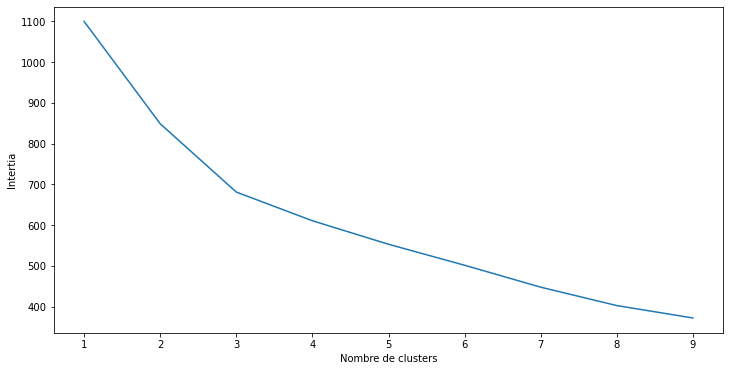

In [36]:
# Graphique
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Intertia")
ax.set_xlabel("Nombre de clusters")
ax = plt.plot(k_list, intertia)

In [37]:
# fin des tests

In [38]:
kmeans = KMeans(n_clusters=4)
#Entrainement
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [39]:
# Variable labels des clusters
kmeans.labels_

array([3, 1, 2, 1, 3, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 3,
       1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1])

In [40]:
# Liste de lettre (une lettre par cluster)
dd = {i:j for i,j in enumerate(list("abcd"))}
# Modifictation des chiffres de cluster en lettre
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['d', 'b', 'c', 'b', 'd', 'b', 'a', 'c', 'b', 'b']

In [41]:
# TEST a verifier
X = Df_In.copy()

In [42]:
X["cluster"] = labels
X

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Afrique du Sud,2035.0,514.0,63.0,-451.0,14.11,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188,d
Albanie,47.0,38.0,0.0,-38.0,6.26,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871,b
Algérie,264.0,2.0,0.0,-2.0,1.97,36.035334,41389189.0,-0.92,4.136417,4109.696001,5.254969,c
Antigua-et-Barbuda,5.0,7.0,0.0,-7.0,17.77,26.665439,95426.0,0.75,1.222545,15383.415188,2.596904,b
Arabie saoudite,1435.0,722.0,10.0,-712.0,15.57,63.100136,33101179.0,-0.64,4.646660,20802.464299,-0.316224,d
...,...,...,...,...,...,...,...,...,...,...,...,...
Zambie,58.0,12.0,1.0,-11.0,1.15,66.587954,16853599.0,0.15,17.075699,1534.874627,5.009519,c
Zimbabwe,67.0,6.0,0.0,-6.0,1.59,21.523629,14236595.0,-0.71,5.707857,1548.186368,2.573529,c
Émirats arabes unis,412.0,433.0,94.0,-339.0,14.80,207.299568,9487203.0,0.62,6.562207,40644.804043,1.545490,a


In [43]:
#sns.pairplot(X, hue="cluster")

In [44]:
# Df par cluster
Kmeans_cluster_A = X.loc[X['cluster']=='a']
Kmeans_cluster_B = X.loc[X['cluster']=='b']
Kmeans_cluster_C = X.loc[X['cluster']=='c']
Kmeans_cluster_D = X.loc[X['cluster']=='d']

In [45]:
# Tableau centroide
# valeur moyenne de chaque cluster definie
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
kmeans_centroids = pd.DataFrame(centroids, index=["cluster_A", "cluster_B", "cluster_C", "cluster_D"])
# Ajout des noms de colonnes
kmeans_centroids.columns = features_dfin
kmeans_centroids

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
cluster_A,-0.285642,0.018878,0.818376,0.099559,0.531203,0.224904,-0.449900,1.443104,0.068164,2.615751,-0.802559
cluster_B,-0.127271,-0.195857,-0.045174,0.195399,0.330158,-0.348091,-0.264625,0.202275,0.065715,-0.181810,-0.285665
cluster_C,-0.273079,-0.253889,-0.426863,0.199728,-1.024373,0.678736,0.246569,-0.849184,-0.256339,-0.591832,0.871626
cluster_D,3.551417,3.616785,1.268668,-3.545138,0.910286,-0.282495,2.535742,-0.436713,0.550025,0.155386,-0.019404


In [46]:
Kmeans_cluster_A.shape, Kmeans_cluster_B.shape, Kmeans_cluster_C.shape, Kmeans_cluster_D.shape

((10, 12), (57, 12), (28, 12), (5, 12))

In [47]:
Kmeans_cluster_A.describe()

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
count,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,123.80000,83.100000,30.50000,-52.600000,9.457000,40.784313,5.377767e+06,1.127000,7.148440,68407.380338,0.283536
std,117.03067,129.488266,40.76559,102.684198,2.906082,59.876303,3.801626e+06,0.236927,4.955474,21525.651049,2.609645
min,10.00000,2.000000,0.00000,-339.000000,6.490000,6.449980,3.343930e+05,0.620000,0.367379,40644.804043,-4.990482
25%,41.00000,12.250000,0.25000,-43.250000,7.265000,13.863881,1.655258e+06,1.012500,4.295722,49137.125184,-1.535992
50%,113.00000,37.000000,8.00000,-16.500000,7.840000,19.705780,5.403848e+06,1.125000,6.274883,72259.035830,0.930373
75%,153.25000,95.250000,64.25000,-4.500000,11.825000,35.760180,8.728877e+06,1.312500,9.394399,79588.180103,2.406172
max,412.00000,433.000000,94.00000,-2.000000,14.800000,207.299568,9.904896e+06,1.430000,18.147254,111017.182246,3.093812


In [48]:
Kmeans_cluster_B.describe()

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,57.000000,57.000000,57.000000,57.000000
mean,237.526316,46.245614,9.596491,-36.649123,8.466842,21.492254,1.109966e+07,0.218070,7.135164,10114.110641,2.232523
std,373.500866,57.497913,20.259795,51.466526,4.636743,28.461558,1.716172e+07,0.569547,5.306979,8105.600411,2.767753
min,3.000000,0.000000,0.000000,-290.000000,0.670000,-19.113828,5.204500e+04,-1.080000,-9.827668,1065.514207,-4.203936
25%,30.000000,4.000000,0.000000,-46.000000,5.660000,2.835607,1.951097e+06,-0.260000,3.522873,3914.525246,0.269440
50%,75.000000,21.000000,1.000000,-17.000000,7.380000,14.958612,4.106769e+06,0.200000,7.452143,7230.472774,2.159574
75%,275.000000,68.000000,8.000000,-4.000000,10.880000,34.722753,1.064103e+07,0.650000,8.984045,15383.415188,3.917960
max,1621.000000,291.000000,115.000000,0.000000,21.880000,112.942262,9.460065e+07,1.250000,19.988156,31781.123320,9.390416


In [49]:
Kmeans_cluster_C.describe()

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,2.800000e+01,28.000000,28.000000,28.000000,28.000000
mean,132.821429,36.285714,0.357143,-35.928571,1.795714,56.064282,2.688703e+07,-0.552143,5.389922,1570.406560,6.596176
std,273.766737,59.440513,1.366647,58.798418,1.561041,18.761208,3.387969e+07,0.569551,4.920207,1100.973268,3.934956
min,3.000000,0.000000,0.000000,-247.000000,0.150000,21.523629,2.855100e+05,-1.290000,-3.015992,461.414754,-1.984963
25%,21.500000,1.750000,0.000000,-37.250000,0.802500,43.988101,8.584820e+06,-0.970000,3.147433,770.995304,3.324565
50%,60.000000,11.000000,0.000000,-10.500000,1.220000,59.216718,1.593518e+07,-0.660000,4.692230,1315.954524,7.691184
75%,103.000000,37.250000,0.000000,-1.750000,2.292500,67.309620,2.876713e+07,-0.245000,7.245215,1744.095419,9.498796
max,1459.000000,249.000000,7.000000,0.000000,6.110000,98.055942,1.596854e+08,0.790000,17.075699,4236.114906,14.052530


In [50]:
Kmeans_cluster_D.describe()

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000
mean,2879.200000,700.60000,41.400000,-659.200000,11.324000,23.700798,9.758421e+07,-0.250000,9.759690,17140.318697,3.236481
std,1333.680322,342.74597,47.183684,386.908516,3.446408,26.211221,4.933999e+07,0.783773,9.718543,13229.644274,3.647375
min,1435.000000,226.00000,9.000000,-1059.000000,7.240000,-0.458226,3.310118e+07,-0.800000,-1.254368,6121.876572,-0.316224
25%,2035.000000,514.00000,10.000000,-963.000000,9.260000,-0.252487,5.700976e+07,-0.640000,4.646660,9287.841557,1.062071
50%,2359.000000,722.00000,10.000000,-712.000000,10.440000,27.594526,1.247773e+08,-0.640000,6.213095,10817.003315,1.650093
75%,4058.000000,972.00000,63.000000,-451.000000,14.110000,28.520044,1.275027e+08,-0.280000,16.114973,20802.464299,5.076188
max,4509.000000,1069.00000,115.000000,-111.000000,15.570000,63.100136,1.455301e+08,1.110000,23.078092,38672.407740,8.710279


In [51]:
Kmeans_cluster_A.head(2)

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Autriche,160.0,110.0,78.0,-32.0,7.49,10.188175,8819901.0,1.05,4.615601,47309.051637,3.093812,a
Chine - RAS de Macao,21.0,23.0,0.0,-23.0,11.90,47.653711,622585.0,1.43,10.161502,81043.968656,1.960991,a


In [52]:
Kmeans_cluster_B

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Albanie,47.0,38.0,0.0,-38.0,6.26,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871,b
Antigua-et-Barbuda,5.0,7.0,0.0,-7.0,17.77,26.665439,95426.0,0.75,1.222545,15383.415188,2.596904,b
Arménie,47.0,35.0,0.0,-35.0,5.44,-3.839143,2944791.0,-0.62,8.984045,3914.525246,2.921893,b
Barbade,13.0,2.0,0.0,-2.0,15.33,5.570963,286232.0,0.97,3.086360,17419.313704,6.024096,b
Belize,10.0,0.0,0.0,0.0,8.26,54.891939,375769.0,0.04,0.656581,4909.683057,-1.059354,b
Bolivie (État plurinational de),403.0,1.0,1.0,0.0,11.43,34.863221,11192855.0,-0.28,8.921000,3351.127399,5.808590,b
Bosnie-Herzégovine,56.0,10.0,8.0,-2.0,5.66,-11.389788,3351525.0,-0.35,8.012034,5394.741461,2.442488,b
Botswana,7.0,3.0,0.0,-3.0,1.19,37.164326,2205080.0,1.02,8.964811,7893.362920,2.800000,b
Bulgarie,157.0,108.0,45.0,-63.0,8.74,-11.832384,7102444.0,0.33,10.492325,8335.277986,3.917960,b


In [53]:
Kmeans_cluster_C

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Algérie,264.0,2.0,0.0,-2.0,1.97,36.035334,41389189.0,-0.92,4.136417,4109.696001,5.254969,c
Bangladesh,240.0,0.0,0.0,0.0,0.47,26.413458,159685424.0,-1.26,10.298823,1538.233627,7.866710,c
Bénin,161.0,123.0,0.0,-123.0,4.98,67.275356,11175198.0,0.03,4.534691,1136.593360,8.512919,c
Cameroun,78.0,0.0,0.0,0.0,1.07,62.539361,24566073.0,-1.10,4.454693,1425.106072,0.536673,c
Côte d'Ivoire,62.0,7.0,0.0,-7.0,0.86,52.353302,24437470.0,-1.09,4.849769,2111.026809,4.090324,c
Gambie,8.0,16.0,0.0,-16.0,1.24,73.035502,2213889.0,-0.08,-0.430628,679.778473,8.090097,c
Ghana,211.0,151.0,0.0,-151.0,2.26,54.402844,29121465.0,0.09,5.183600,2074.175443,8.118361,c
Guatemala,348.0,129.0,7.0,-122.0,6.11,48.040764,16914970.0,-0.65,6.350033,4236.114906,9.441399,c
Guinée,49.0,37.0,0.0,-37.0,1.42,50.645550,12067519.0,-0.70,16.728287,855.575057,14.052530,c


In [54]:
Kmeans_cluster_D

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Afrique du Sud,2035.0,514.0,63.0,-451.0,14.11,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188,d
Arabie saoudite,1435.0,722.0,10.0,-712.0,15.57,63.100136,33101179.0,-0.64,4.646660,20802.464299,-0.316224,d
Fédération de Russie,4509.0,226.0,115.0,-111.0,10.44,-0.458226,145530082.0,-0.64,23.078092,10817.003315,1.650093,d
Japon,2359.0,1069.0,10.0,-1059.0,7.24,-0.252487,127502725.0,1.11,-1.254368,38672.407740,1.062071,d
Mexique,4058.0,972.0,9.0,-963.0,9.26,27.594526,124777324.0,-0.80,6.213095,9287.841557,8.710279,d


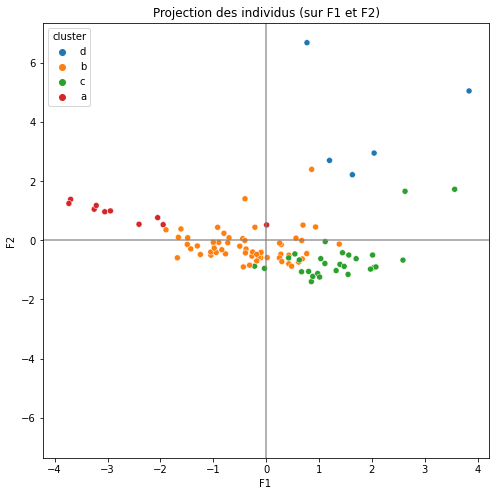

In [55]:
# Cluster: F1 F2
display_factorial_planes(X_proj, (0,1), clusters=X['cluster'], figsize=(8, 8))# , labels=pays

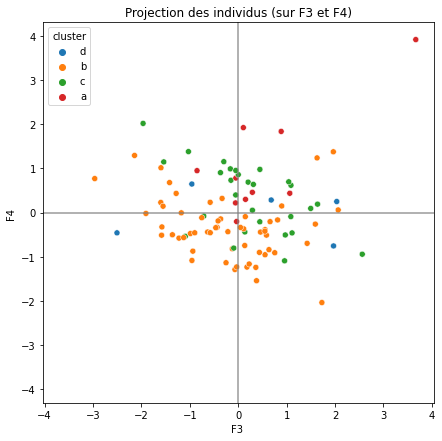

In [56]:
# Cluster: F3 F4
display_factorial_planes(X_proj, (2,3), clusters=X['cluster'])

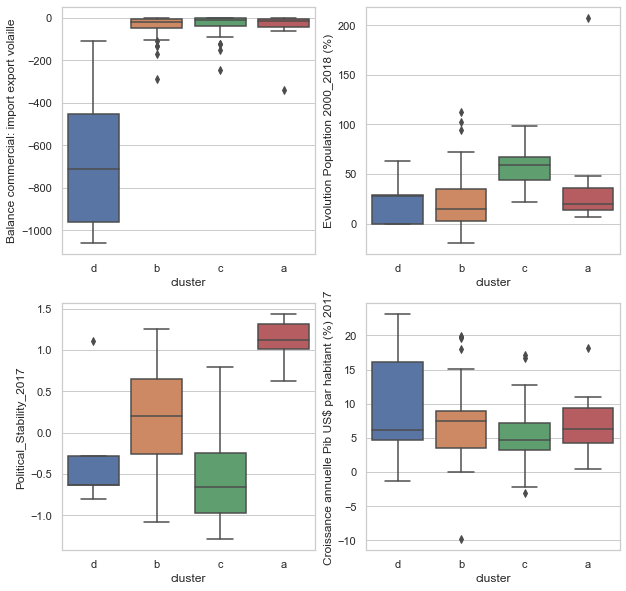

In [57]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X, x="cluster", y="Balance commercial: import export volaille")
plt.subplot(222)
sns.boxplot(data=X, x="cluster", y="Evolution Population 2000_2018 (%)")
plt.subplot(223)
sns.boxplot(data=X, x="cluster", y="Political_Stability_2017")
plt.subplot(224)
sns.boxplot(data=X, x="cluster", y="Croissance annuelle Pib US$ par habitant (%) 2017")
plt.savefig("Boxplot_Cluster_Kmeans.jpg")
plt.show()

# ACH: Algorithme de classification hiérarchique

In [58]:
# Copy Df IN
ach_in = Df_In.copy()
# transformer les données en array numpy
ach_array = ach_in.values 

In [59]:
# Enregistrement des noms de pays
pays_dfin = Df_In.index
pays_dfin

Index(['Afrique du Sud', 'Albanie', 'Algérie', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Arménie', 'Autriche', 'Bangladesh', 'Barbade',
       'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Bulgarie', 'Bénin', 'Cameroun', 'Chili',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Côte d'Ivoire', 'Dominique', 'El Salvador', 'Estonie',
       'Eswatini', 'Fidji', 'Finlande', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Géorgie', 'Haïti',
       'Honduras', 'Irlande', 'Islande', 'Jamaïque', 'Japon', 'Jordanie',
       'Kazakhstan', 'Kenya', 'Kirghizistan', 'Koweït', 'Lesotho', 'Lettonie',
       'Libéria', 'Luxembourg', 'Macédoine du Nord', 'Madagascar', 'Malaisie',
       'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mexique', 'Mongolie',
       'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Norvège',
       'Népal', 'Oman', 'Ouganda', 'Pana

In [60]:
# Enregistrement des noms de colonnes
features_dfin = Df_In.columns
features_dfin

Index(['Nourriture: Viande de Volailles', 'Importation: Viande de Volailles',
       'Exportation: Viande de Volailles',
       'Balance commercial: import export volaille',
       'Proteine: Viande de Volailles (g/personne/jour)',
       'Evolution Population 2000_2018 (%)', 'Population_2017',
       'Political_Stability_2017',
       'Croissance annuelle Pib US$ par habitant (%) 2017',
       'Pib US$ par habitant (2017)', 'Inflation alimentaire (%) 2017'],
      dtype='object')

In [61]:
Z = linkage(ach_in, method="ward") #X_scaled2
pd.DataFrame(Z)

,0,1,2,3
0,25.0,65.0,3.718238e+03,2.0
1,49.0,53.0,1.047455e+04,2.0
2,12.0,32.0,1.138578e+04,2.0
3,8.0,93.0,1.435522e+04,2.0
4,10.0,14.0,1.779785e+04,2.0
...,...,...,...,...
94,190.0,192.0,5.629335e+07,75.0
95,188.0,193.0,6.465730e+07,6.0
96,189.0,191.0,6.480347e+07,19.0
97,194.0,196.0,1.722280e+08,94.0


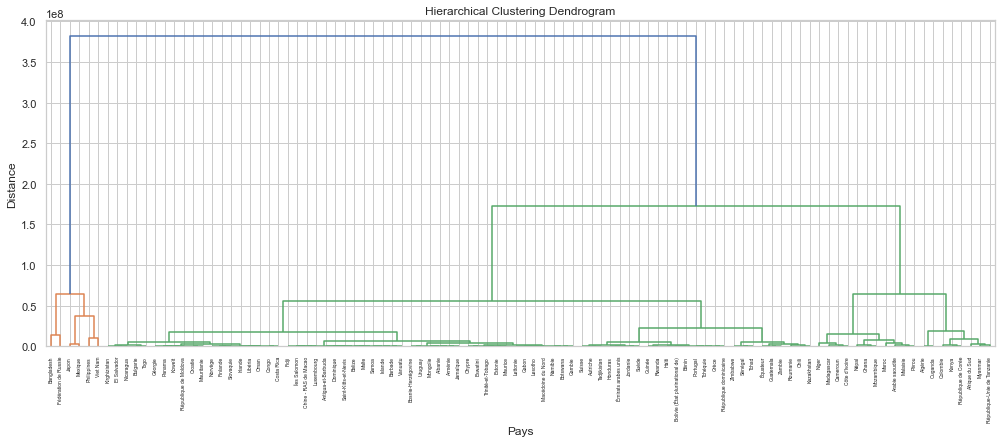

In [62]:
# dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(17, 6))

_ = dendrogram(Z, labels = ach_in.index, ax=ax) #, orientation='right'

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.savefig("Dendrogram.jpg")
plt.show()

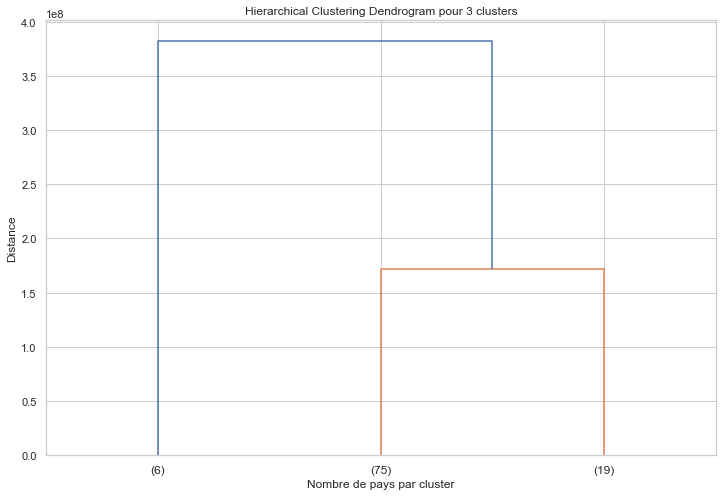

In [63]:
# Dendrogramme reduction
# les arguments p=3, truncate_mode="lastp" signifient que l'on ne va afficher que 3 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=3, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram pour 3 clusters")
plt.xlabel("Nombre de pays par cluster")
plt.ylabel("Distance")
plt.savefig("Dendrogram_reduit.jpg")
plt.show()

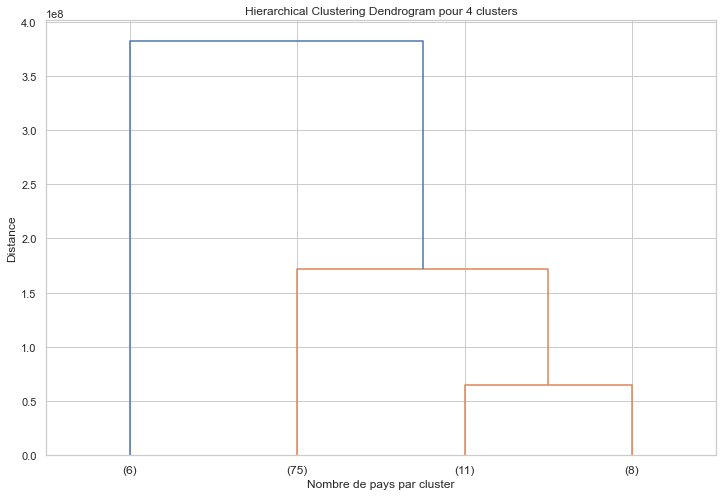

In [64]:
# Dendrogramme reduction
# les arguments p=4, truncate_mode="lastp" signifient que l'on ne va afficher que 4 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=4, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram pour 4 clusters")
plt.xlabel("Nombre de pays par cluster")
plt.ylabel("Distance")
plt.savefig("Dendrogram_reduit.jpg")
plt.show()

In [65]:
# Cluster ACH avec Scikit-learn
from sklearn.cluster import AgglomerativeClustering
# Instancie un estimateur
cah = AgglomerativeClustering(n_clusters=4, linkage="ward")

In [66]:
# Entrainement de l'estimateur
cah.fit(ach_in)

AgglomerativeClustering(n_clusters=4)

In [67]:
# Affichage des clusters
cah.labels_

array([1, 2, 1, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 0, 2, 3, 1, 2, 2,
       3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int64)

In [68]:
# Modification des noms de clusters en lettre
dd = {i:j for i,j in enumerate(list("abcd"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'c', 'b', 'c', 'd', 'c', 'c', 'a', 'c', 'c']

In [69]:
# Ajout colonne cluster avec les labels
ach_in["cluster"] = labels

In [70]:
# Df par cluster
ACH_cluster_A = ach_in.loc[ach_in['cluster']=='a']
ACH_cluster_B = ach_in.loc[ach_in['cluster']=='b']
ACH_cluster_C = ach_in.loc[ach_in['cluster']=='c']
ACH_cluster_D = ach_in.loc[ach_in['cluster']=='d']

In [71]:
ACH_cluster_A.shape, ACH_cluster_B.shape, ACH_cluster_C.shape, ACH_cluster_D.shape

((6, 12), (8, 12), (75, 12), (11, 12))

In [72]:
ACH_cluster_A

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Bangladesh,240.0,0.0,0.0,0.0,0.47,26.413458,159685424.0,-1.26,10.298823,1538.233627,7.866710,a
Fédération de Russie,4509.0,226.0,115.0,-111.0,10.44,-0.458226,145530082.0,-0.64,23.078092,10817.003315,1.650093,a
Japon,2359.0,1069.0,10.0,-1059.0,7.24,-0.252487,127502725.0,1.11,-1.254368,38672.407740,1.062071,a
Mexique,4058.0,972.0,9.0,-963.0,9.26,27.594526,124777324.0,-0.80,6.213095,9287.841557,8.710279,a
Philippines,1459.0,249.0,2.0,-247.0,4.65,36.747011,105172925.0,-1.19,1.613303,3123.244296,3.285968,a
Viet Nam,1166.0,291.0,1.0,-290.0,4.01,19.566349,94600648.0,0.23,7.907523,2365.521494,-1.370011,a


In [73]:
ACH_cluster_B

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Afrique du Sud,2035.0,514.0,63.0,-451.0,14.11,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188,b
Algérie,264.0,2.0,0.0,-2.0,1.97,36.035334,41389189.0,-0.92,4.136417,4109.696001,5.254969,b
Colombie,1565.0,78.0,2.0,-76.0,9.57,25.311855,48909839.0,-0.77,8.617766,6376.707362,0.590172,b
Kenya,34.0,0.0,0.0,0.0,0.23,60.779844,50221142.0,-1.13,7.135500,1634.068744,11.497822,b
Myanmar,1621.0,3.0,0.0,-3.0,9.93,14.958612,53382523.0,-1.08,1.205772,1277.743698,2.524721,b
Ouganda,62.0,0.0,0.0,0.0,0.51,80.671143,41166588.0,-0.57,-0.335264,767.101705,9.927431,b
République de Corée,854.0,137.0,6.0,-131.0,5.68,8.004487,51096415.0,0.39,8.012736,31781.123320,2.738238,b
République-Unie de Tanzanie,103.0,2.0,0.0,-2.0,0.63,68.103930,54660339.0,-0.56,4.065654,1001.160919,9.278937,b


In [74]:
ACH_cluster_C

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Albanie,47.0,38.0,0.0,-38.0,6.26,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871,c
Antigua-et-Barbuda,5.0,7.0,0.0,-7.0,17.77,26.665439,95426.0,0.75,1.222545,15383.415188,2.596904,c
Arménie,47.0,35.0,0.0,-35.0,5.44,-3.839143,2944791.0,-0.62,8.984045,3914.525246,2.921893,c
Autriche,160.0,110.0,78.0,-32.0,7.49,10.188175,8819901.0,1.05,4.615601,47309.051637,3.093812,c
Barbade,13.0,2.0,0.0,-2.0,15.33,5.570963,286232.0,0.97,3.086360,17419.313704,6.024096,c
...,...,...,...,...,...,...,...,...,...,...,...,...
Zambie,58.0,12.0,1.0,-11.0,1.15,66.587954,16853599.0,0.15,17.075699,1534.874627,5.009519,c
Zimbabwe,67.0,6.0,0.0,-6.0,1.59,21.523629,14236595.0,-0.71,5.707857,1548.186368,2.573529,c
Émirats arabes unis,412.0,433.0,94.0,-339.0,14.80,207.299568,9487203.0,0.62,6.562207,40644.804043,1.545490,c


In [75]:
ACH_cluster_D

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,cluster
Zone,,,,,,,,,,,,
Arabie saoudite,1435.0,722.0,10.0,-712.0,15.57,63.100136,33101179.0,-0.64,4.646660,20802.464299,-0.316224,d
Cameroun,78.0,0.0,0.0,0.0,1.07,62.539361,24566073.0,-1.10,4.454693,1425.106072,0.536673,d
Côte d'Ivoire,62.0,7.0,0.0,-7.0,0.86,52.353302,24437470.0,-1.09,4.849769,2111.026809,4.090324,d
Ghana,211.0,151.0,0.0,-151.0,2.26,54.402844,29121465.0,0.09,5.183600,2074.175443,8.118361,d
Madagascar,73.0,0.0,0.0,0.0,0.97,66.567109,25570512.0,-0.30,8.265003,515.293303,9.670987,d
Malaisie,1220.0,68.0,44.0,-24.0,12.95,35.930343,31104646.0,0.12,4.496181,10259.210256,4.581994,d
Maroc,746.0,3.0,1.0,-2.0,7.29,25.128480,35581255.0,-0.37,4.809082,3082.599304,-0.928074,d
Mozambique,103.0,24.0,0.0,-24.0,1.20,66.531874,28649018.0,-0.93,7.574358,461.414754,9.917114,d
Niger,20.0,3.0,0.0,-3.0,0.32,98.055942,21602382.0,-1.27,3.509916,517.771881,1.521358,d


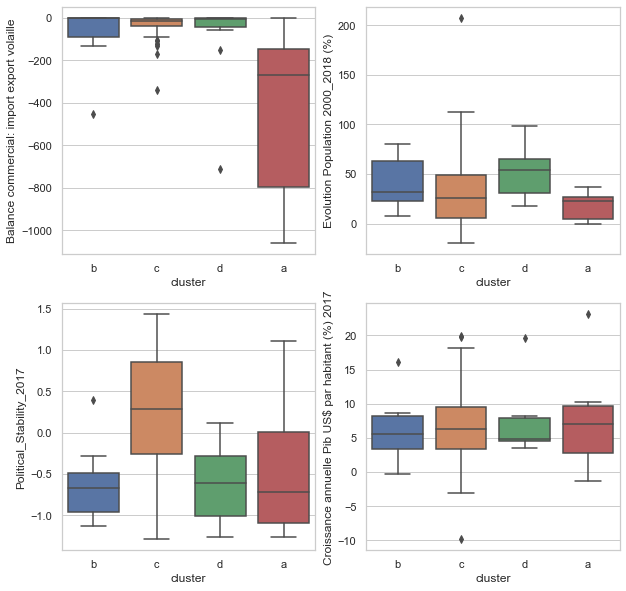

In [76]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=ach_in, x="cluster", y="Balance commercial: import export volaille")
plt.subplot(222)
sns.boxplot(data=ach_in, x="cluster", y="Evolution Population 2000_2018 (%)")
plt.subplot(223)
sns.boxplot(data=ach_in, x="cluster", y="Political_Stability_2017")
plt.subplot(224)
sns.boxplot(data=ach_in, x="cluster", y="Croissance annuelle Pib US$ par habitant (%) 2017")
plt.savefig("Boxplot_Cluster_ACH.jpg")
plt.show()

In [77]:
# Instanciation
scaler2 = StandardScaler()
# Transformation – centrage-réduction
X_scaled2 = scaler2.fit_transform(ach_array)

In [78]:
# On espère avoir une moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled2).describe().round(2).loc[idx, :] 

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01


In [79]:
# Travail sur les 4 premieres composantes
n_components = 4
# On instancie notre ACP
pca = PCA(n_components=4)
# Entrainement des données scalées
pca.fit(X_scaled2)

PCA(n_components=4)

In [80]:
# Calcule des coordonnées des individus dans le nouvel espace
X_proj2 = pca.transform(X_scaled2)
X_proj2[:5]

array([[ 4.90854717,  0.41921253,  1.30357092,  0.88694608],
       [-0.74886465,  0.17491834,  0.91692125, -1.01763211],
       [-0.31717399, -1.88449664, -0.09149847, -0.13956258],
       [-0.85956089,  1.64414211, -0.96916262, -0.68619404],
       [ 4.98768294,  0.6919137 , -2.46946823, -0.20351265]])

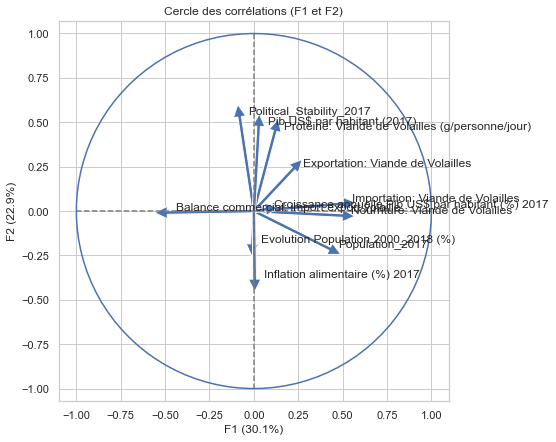

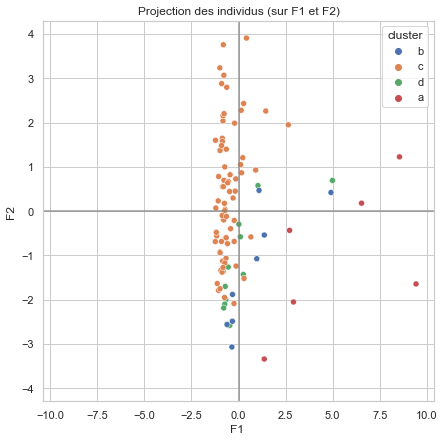

In [81]:
# Graphique F1 F2
correlation_graph(pca, (0,1), features_dfin)
display_factorial_planes(X_proj2, (0,1), clusters=ach_in['cluster'])#, labels=pays_dfin

# Produisez une étude de marché avec R ou Python

Soutenance 
Pendant la soutenance, l’évaluateur jouera le rôle de Patrick, votre manager à qui vous présentez vos résultats :

Présentation (15 minutes)
le contexte 
votre démarche 
vos résultats et recommandations
Discussion (10 minutes)
Toujours dans le rôle de manager, l’évaluateur vous posera des questions sur votre travail et sur vos choix.
Débriefing (5 minutes)
À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Patrick pour vous permettre de débriefer ensemble.